In [83]:
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

COLUMN_WIDTH = 3.25  # Inches
TEXT_WIDTH = 6.299213  # Inches
GOLDEN_RATIO = 1.61803398875
DPI = 300
FONT_SIZE = 8

In [96]:
# load success rate
DATAPATH = '../output_from_datalab/active_learning'
FIGPATH = '../test'
NUM_RUNS = 100
DATASET_LIST = ['imagenet', 'dbpedia', 'cifar100', '20newsgroup', 'svhn', 'imagenet2_topimages'] 
METHOD_LIST = ['random', 'ts_uniform', 'ttts_uniform', 'ts_informed', 'ttts_informed', 'epsilon_greedy', 'bayesian_ucb']

def get_success_rate(metric, dataset, mode, method):
    pickle_filename = "%s/%s_%s_%s_%s_runs_%d.pkl" % (DATAPATH, dataset, metric, mode, method, NUM_RUNS)
    return pickle.load(open(pickle_filename, "rb"))

def get_figure_name(metric, dataset, mode):
    return "%s/%s_%s_%s_runs_%d.pdf" % (FIGPATH, dataset, metric, mode, NUM_RUNS)

In [97]:
def plot(success_rate_dict, figname):
    plt.figure(figsize=(5, 3), constrained_layout=True)
    for idx, method_name in enumerate(METHOD_LIST):
        plt.plot(success_rate_dict[method_name], label=method_name)
        plt.legend()
    plt.xlabel('#Queries')
    plt.ylabel('Success Rate')
    plt.yticks(fontsize=FONT_SIZE)
    plt.xticks(fontsize=FONT_SIZE)
    plt.ylim(0.0, 1.0)
    plt.savefig(figname, format='pdf', dpi=300, bbox_inches='tight')

/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_pat

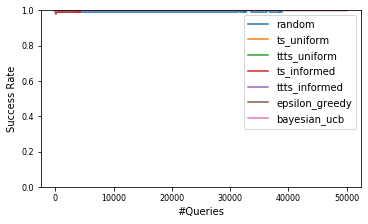

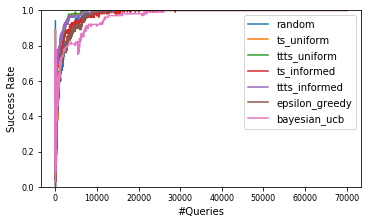

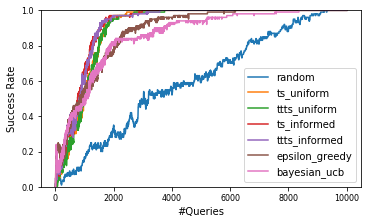

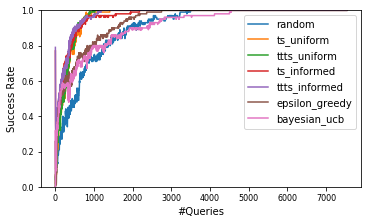

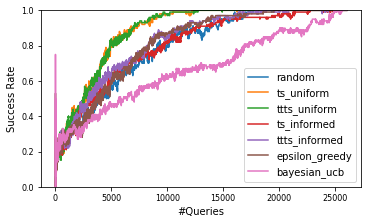

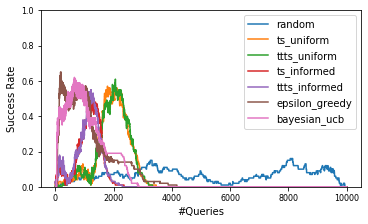

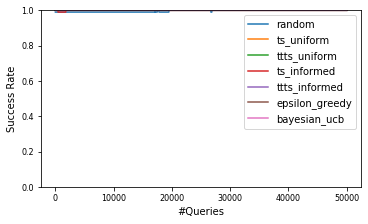

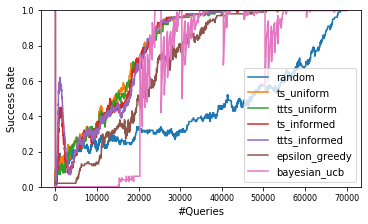

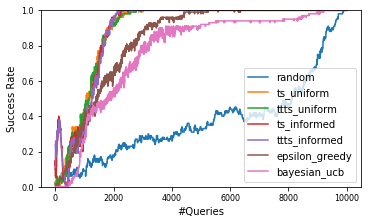

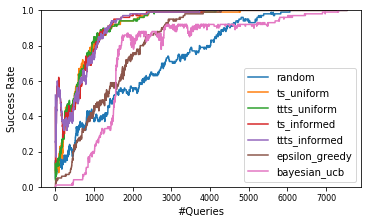

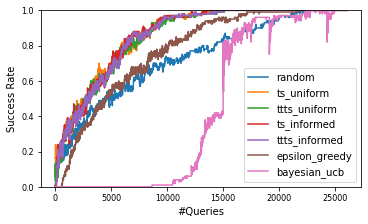

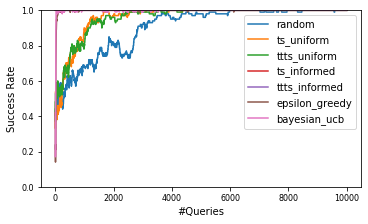

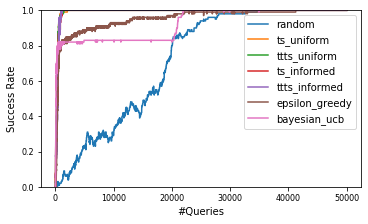

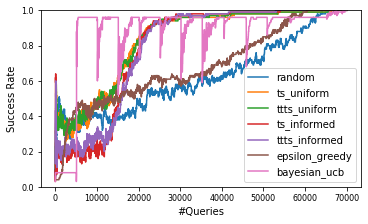

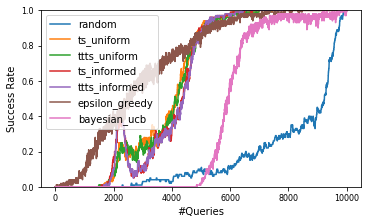

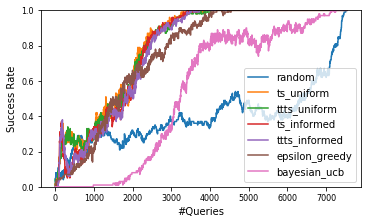

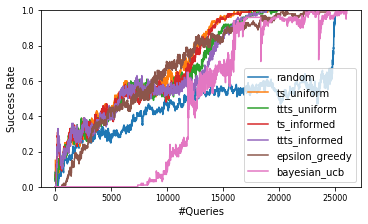

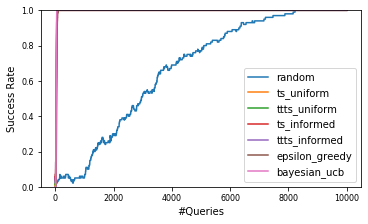

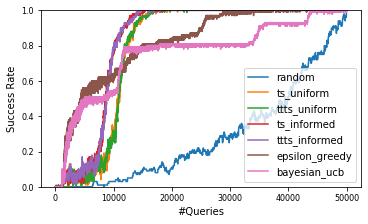

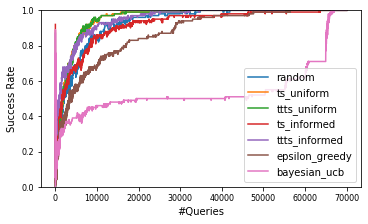

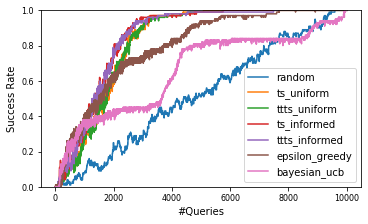

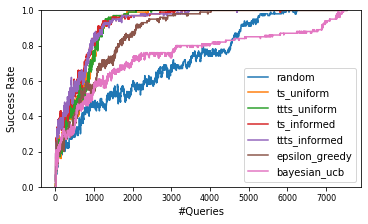

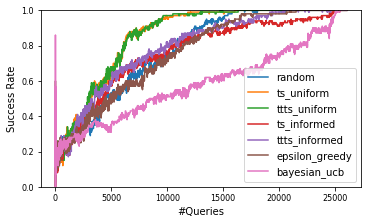

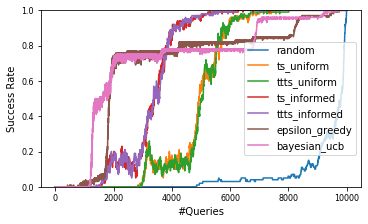

In [98]:
for metric in ['accuracy', 'calibration_bias']:
    for mode in ['min', 'max']:
        for dataset in DATASET_LIST:
            # load results
            success_rate_dict = {}
            for method in METHOD_LIST:
                success_rate_dict[method] = get_success_rate(metric, dataset, mode, method)
            # plot
            figname = get_figure_name(metric, dataset, mode)
            plot(success_rate_dict, figname)

In [105]:
dataset = 'CIFAR100'
metric = 'accuracy'
mode = 'min'
success_rate_dict = {}
for method in METHOD_LIST:
    success_rate_dict[method] = get_success_rate(metric, dataset, mode, method)
    count = min([i for i in range(success_rate_dict[method].shape[0]) if success_rate_dict[method][i] > 0.95])
    print('minimum number of samples to get 95% success rate:', count, 'for', method)
# plot
success_rate_dict

minimum number of samples to get 95% success rate: 8327 for random
minimum number of samples to get 95% success rate: 1918 for ts_uniform
minimum number of samples to get 95% success rate: 2088 for ttts_uniform
minimum number of samples to get 95% success rate: 1729 for ts_informed
minimum number of samples to get 95% success rate: 1921 for ttts_informed
minimum number of samples to get 95% success rate: 3511 for epsilon_greedy
minimum number of samples to get 95% success rate: 5207 for bayesian_ucb


{'random': array([0., 0., 0., ..., 1., 1., 1.]),
 'ts_uniform': array([0., 0., 0., ..., 1., 1., 1.]),
 'ttts_uniform': array([0., 0., 0., ..., 1., 1., 1.]),
 'ts_informed': array([0.01, 0.02, 0.03, ..., 1.  , 1.  , 1.  ]),
 'ttts_informed': array([0.  , 0.01, 0.02, ..., 1.  , 1.  , 1.  ]),
 'epsilon_greedy': array([0., 0., 0., ..., 1., 1., 1.]),
 'bayesian_ucb': array([0., 0., 0., ..., 1., 1., 1.])}